<a href="https://colab.research.google.com/github/AgunsBaba/Assignment/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# view the shape of the dataset
mnist.data.shape

(70000, 784)

In [39]:
#import modules
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [40]:
#instantiate the data in to X and y
X = mnist.data
y = mnist.target

In [41]:
#instantiate and fit the PCA algo
pca = PCA()
pca.fit(X)

PCA()

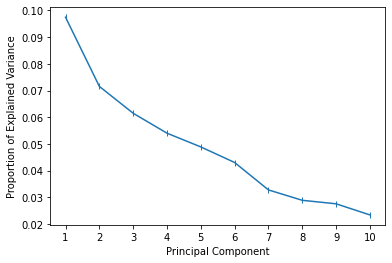

In [42]:
# Plot the explained variance ratios of the first 10 principal components
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker = '|')
plt.xticks(ticks = range(1, 11))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.show()

From the chart above, it seems the variance explained seems to drop off after 2 principal components. So we'll instantiate a PCA algo with n_components = 2 for starters

**Logistic Regression with PCA when n_components = 2**

In [43]:
#fit the PCA algo with the best n_component
pca_best = PCA(n_components=2)

#instantiate model
logreg = LogisticRegression()

#Instantiate scaler
scaler = StandardScaler()

In [44]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
#make pipeline
logreg_pipe = make_pipeline(scaler, pca_best, logreg)

In [46]:
#fit pipeline
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

In [47]:
#generate accuracy score
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.3370408163265306
Testing accuracy: 0.338


The accuracy of the Logistic Regression model with PCA when n_components = 2 is very low (worse than a random guess). The reason is beacuse two principal components can only explain less than 20% of the variance in the dataset (based on the chart above).

My next step would be to fit a Logistic Regression model with PCA with all the 784 components (i.e. n_components = 784) and fir another Logistic Regression model without PCA and then compare the performance

**Logistic Regression with PCA when n_components = 784**

In [48]:
#fit PCA with 784 components
pca_all = PCA(n_components=784)

#make pipeline
pipe_all = make_pipeline(scaler, pca_all, logreg)

In [49]:
%%%time
#fit pipeline
pipe_all.fit(X_train, y_train)

CPU times: user 1min 19s, sys: 9.1 s, total: 1min 28s
Wall time: 49.3 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=784)),
                ('logisticregression', LogisticRegression())])

In [50]:
#generate accuracy score
print('Training accuracy:', pipe_all.score(X_train, y_train))
print('Testing accuracy:', pipe_all.score(X_test, y_test))

Training accuracy: 0.946734693877551
Testing accuracy: 0.9136666666666666


Expectedly, the accuracy score using all the 784 components is better than using just two components

**Vanilla Logistic Regression without PCA**

In [51]:
#make pipeline
logreg_only = make_pipeline(scaler, logreg)

In [52]:
%%%time
#fit the pipeline
logreg_only.fit(X_train, y_train)

CPU times: user 1min, sys: 5.91 s, total: 1min 6s
Wall time: 34.9 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [53]:
print('Training accuracy:', logreg_only.score(X_train, y_train))
print('Testing accuracy:', logreg_only.score(X_test, y_test))

Training accuracy: 0.946734693877551
Testing accuracy: 0.9136666666666666


As expected, the accuracy of the vanilla Logistic Regression is similar to a Logistic Regression with PCA using all the components. However, it took about 30% less time to fit the Logistic Regression with PCA